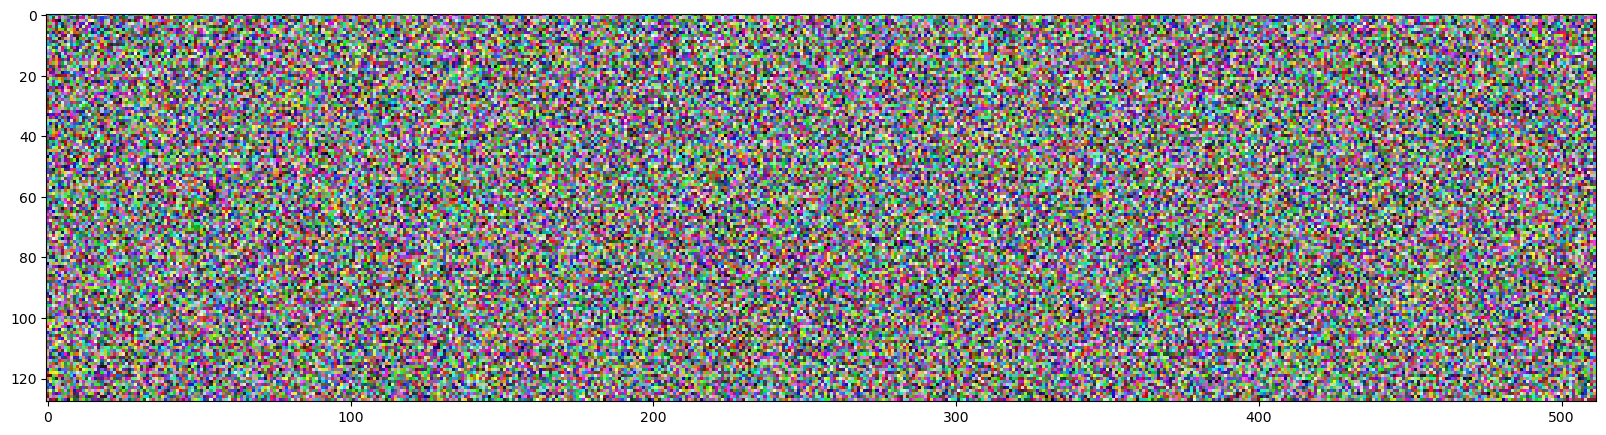

In [2]:
import torch
import matplotlib.pyplot as plt

def plot_images(images):
    figure = plt.figure(figsize=(20,20))
    plt.imshow(torch.cat([image for image in images.cpu()], dim = -1).permute(1,2,0).cpu())
    plt.show()

# Generating Random Images

# Image Dimensions    
numImages=4
imageSize=128

# Generating Random Images
images = torch.rand(numImages,3,imageSize,imageSize)

# Plot
plot_images(images)

In [ ]:
import torch
import numpy as np 
from PIL import Image
import torchvision 
import os

def saveImages(images,path,normalized=True,**kwargs):
    
    # Make Grid
    grid = torchvision.utils.make_grid(images,**kwargs)
    
    # Bring in correct format
    images = grid.permute(1,2,0).to('cpu').numpy()
    
    # Scale if images are normalized
    if normalized:
        images = (images*255)
    
    # Bring in uint8 format
    images = images.astype(np.uint8)
    
    # load
    images = Image.fromarray(images)
    
    # Save
    images.save(path)
    
numImages = 16
imageSize = 64

# Generate Images
images = [torch.randint(0,256,(3,imageSize,imageSize), dtype=torch.uint8) for _ in range(numImages)]

# Output path 
output = "output_images/grid.png"
outputDirectory = os.path.dirname(output)

# Make the directory if not already
os.makedirs(outputDirectory,exist_ok=True)

# Call the function
saveImages(images,output,False,nrow=4)
